In [1]:
from collections import OrderedDict
import numpy as np
import json
from maps import get_duration_matrix, lat_long_to_utm, UTM_to_lat_long, get_lat_long_from_address, plot_map_from_lat_long, plot_solution
import pyproj
from tools import write_vrplib
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# read a xlsx file
data = pd.read_excel('data/inter_iit_data/coorodinates.xlsx', engine='openpyxl')
data.columns

Index(['Unnamed: 0', 'address', 'location', 'AWB', 'names', 'product_id',
       'latitude', 'longitude'],
      dtype='object')

In [3]:
# make a list latitudes_longitudes where each element is a tuple of latitude and longitude from data
latitudes_longitudes = []
for i in range(len(data)):
    latitudes_longitudes.append((data['latitude'][i], data['longitude'][i]))
print(latitudes_longitudes)

[(12.961531199675164, 77.64430479999999), (12.917482299670546, 77.5934466), (12.913999999670178, 77.58549729999999), (12.917482299670546, 77.5934466), (12.910986599669863, 77.59912820000002), (12.907054599669454, 77.5985562), (12.91049, 77.58504), (12.910986599669863, 77.59912820000002), (13.022626899681626, 77.51909), (12.92347539967117, 77.6819331), (12.902712399668994, 77.58551149999998), (12.91086479966985, 77.59677889999998), (12.921752099670991, 77.66380829999999), (12.917621199670556, 77.6124446), (12.90646389966939, 77.59674509999998), (13.024149199681787, 77.52766), (12.886470099667303, 77.5867609), (12.910986599669863, 77.59912820000002), (12.902712399668994, 77.58551149999998), (12.910986599669863, 77.59912820000002), (12.88666989966732, 77.5819859), (12.975063797994913, 77.64007540473895), (12.991037599678284, 77.54968520000001), (12.88666989966732, 77.5819859), (12.900299899668743, 77.5860464), (12.931926999672058, 77.6908101), (12.910986599669863, 77.59912820000002), (12.

In [4]:
# Populate the instance
# n : number of points
# coords : UTM of all the points
# demands : All the points have random demands between 5 and 20 except the first point
# capacity : 5
# vehicle_count : 4
# is_depot : boolean array indicating if the point is depot or not. First point is depot
# duration_matrix : 5x5 matrix with each element is the distance between the two points
# service_times : 0 for all points
# time_windows : pair of 0, 45000 for all points


# instance = OrderedDict()
# instance['n'] = len(latitudes_longitudes)
# instance['coords'] = lat_long_to_utm(latitudes_longitudes).tolist()
# instance['demands'] = [0] + [np.random.randint(5, 20) for _ in range(instance['n'] - 1)]
# instance['capacity'] = 100
# instance['vehicle_count'] = 4
# instance['is_depot'] = [True] + [False] * (instance['n'] - 1)
# instance['duration_matrix'] = get_duration_matrix(latitudes_longitudes).tolist()
# instance['service_times'] = [0] * instance['n']
# instance['time_windows'] = [[0, 45000]] * instance['n']


In [5]:
# print(instance)
# print(UTM_to_lat_long(np.array(instance['coords'])))

In [6]:
# write_vrplib(filename='instances/train_VRPTW.txt', instance=instance)

[[153, 1, 3, 2, 76, 85, 72, 129], [150, 115, 145, 171, 30, 23, 20, 16, 32], [5, 14, 24, 18, 10, 205, 6, 44, 141], [35, 36, 43, 42, 37, 34, 33, 121, 203], [40, 4, 26, 29, 17, 95, 7, 19], [87, 13, 122, 143, 112, 11, 45, 41], [27, 83, 49, 57, 132, 47, 56, 137], [86, 55, 79, 81, 62, 50, 77, 65], [52, 82, 74, 63, 64, 89, 88, 58, 138, 80], [84, 60, 130, 199, 92, 48, 68, 59], [51, 54, 69, 90, 67, 91, 70, 78, 134], [152, 161, 158, 187, 12, 31, 170, 61], [154, 194, 9, 177, 201, 191, 193], [25, 183, 192, 164, 169, 196, 209, 208, 94, 71], [182, 53, 66, 210, 157, 180, 179, 174], [110, 160, 155, 147, 146, 116], [173, 189, 186, 168, 197, 195, 198, 166, 185, 167], [184, 159, 156, 151, 144, 178, 165], [28, 75, 204, 38, 109, 202, 172], [133, 142, 120, 126, 128, 123, 135, 21], [22, 181, 8, 39, 175, 188, 200, 15, 46, 190], [97, 127, 107, 96, 140, 99, 103, 101], [131, 108, 100, 105, 102, 114, 104, 98], [118, 207, 106, 124, 119, 111, 113], [206, 93, 73, 163, 162, 125, 139, 148, 149, 176], [136, 117]]
Route

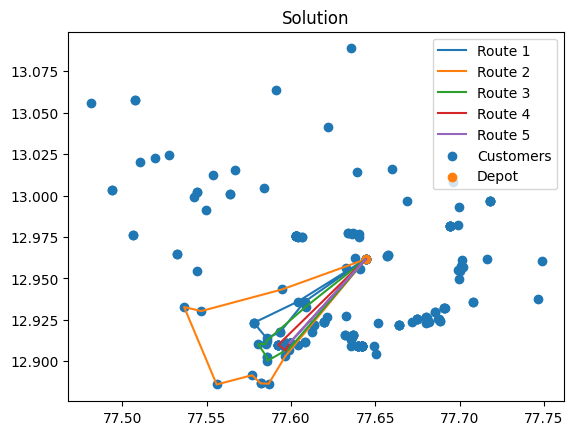

In [9]:
# read solution from solutions/train_VRPTW.txt-1.txt. This has a line starting with Costs: and then a line starting with Solution:. After Solution: there is a dictionary with a single key as 0, the value is a list of list. Extract this list to lists 
# we have to parse the solution to get the list of lists
# each list starts with a `array([` and ends with a `])` and has a `,` in between each element

solution = []
with open('solutions/train_VRPTW.txt-1.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.startswith('Solution:'):
            solution = line.split('Solution:')[1]
            solution = solution.split('array([')[1:]
            solution = [s.split('])')[0] for s in solution]
            solution = [s.split(',') for s in solution]
            solution = [[int(s) for s in sol] for sol in solution]
            break

print(solution)

# Creat a set of solution for testsing
solution = solution[:5]

# plot the solution
plot_solution(latitudes_longitudes=latitudes_longitudes, solution=solution)